In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import scipy

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [ ]:
merged_data = pd.read_csv('/Users/munisabakhromova/Desktop/research/merged_data.csv')

num_samples = 1000
fraction = 0.5
pref = "patience"

def random_sampling_pref(data, preference, num_samples, fraction):
    df = pd.DataFrame()
    sampled_data = pd.DataFrame()

    for i in range(num_samples):
        sampled_data = data.groupby("country")[preference].apply(lambda x: x.sample(frac=fraction, replace=True)).reset_index(level=1, drop=True)
        sampled_data.name = f"{preference}_{i + 1}"
        df = pd.concat([df, sampled_data], axis=1)

    return df

pref_samples = random_sampling_pref(merged_data, preference=pref, num_samples=num_samples, fraction=fraction)

def generate_pref_measure_sample(data):
    patience_sample = pd.DataFrame(data.reset_index().rename(columns={'index': 'country'}).groupby(['country']).mean())
    return patience_sample

pref_measure_samples = generate_pref_measure_sample(pref_samples)

pref_rank_samples = pd.DataFrame()
for i in pref_measure_samples.columns:
    pref_rank_samples[i] = pref_measure_samples[i].rank(ascending=False, method='min')
    pref_rank_samples[i] = pref_rank_samples[i].round().astype(pd.Int8Dtype())

corr_results_measure = pref_measure_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_measure.values, np.nan)

corr_results_rank = pref_rank_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_rank.values, np.nan)

flat_corr_values_rank = corr_results_rank.values.flatten()
flat_corr_values_rank = flat_corr_values_rank[~np.isnan(flat_corr_values_rank)]

flat_corr_values_measure = corr_results_measure.values.flatten()
flat_corr_values_measure = flat_corr_values_measure[~np.isnan(flat_corr_values_measure)]


/var/folders/f8/xf4k31p91fq6xlyklv8cjx3m0000gn/T/ipykernel_40202/3001584163.py:1: DtypeWarning: Columns (16,62,65,67,68,70,71,74,78,79,80,81,82,83,85,87,89,90,93,95,96,98,100,101,102,103,104,108,109,110,111,112,113,114,115,116,117,119,120,124,125,128,130,136,137,138,141,143,146,147,148,153,158,162,164,165,167,169,170,172,173,174,177,183,185,186,187,188,189,190,191,192,193,194,197,199,200,201,202,203,204,205,207,208,209,210,212,213,214,215,217,220,221,223,225,230,231,232,236,238,239,240,241,244,245,246,247,251,253,255,259,260,261,262,264,266,267,271,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,353,354,355,356,358,365,367,369,370,371,372,373,374,376,377,378,379,380,381,382,383,385,386,388,394,395,396,397,398,399,400,405,406,412,413,414,415,416,417,418,4

In [ ]:
staircase_patience = pd.read_stata('/Users/munisabakhromova/Desktop/staircase_patience.dta')

num_samples = 1000
fraction = 0.5
pref = "stair_patience"

def random_sampling_pref_stair(data, preference, num_samples, fraction):
    df = pd.DataFrame()
    sampled_data = pd.DataFrame()

    for i in range(num_samples):
        sampled_data = data.groupby("country")[preference].apply(lambda x: x.sample(frac=fraction, replace=True)).reset_index(level=1, drop=True)
        sampled_data.name = f"{preference}_{i + 1}"
        df = pd.concat([df, sampled_data], axis=1)

    return df

pref_samples_staircase = random_sampling_pref_stair(staircase_patience, preference=pref, num_samples=num_samples, fraction=fraction)

def generate_pref_measure_sample(data):
    patience_sample = pd.DataFrame(data.reset_index().rename(columns={'index': 'country'}).groupby(['country']).mean())
    return patience_sample

pref_measure_samples = generate_pref_measure_sample(pref_samples_staircase)

pref_rank_samples = pd.DataFrame()
for i in pref_measure_samples.columns:
    pref_rank_samples[i] = pref_measure_samples[i].rank(ascending=False, method='min')
    pref_rank_samples[i] = pref_rank_samples[i].round().astype(pd.Int8Dtype())

corr_results_measure = pref_measure_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_measure.values, np.nan)

corr_results_rank = pref_rank_samples.iloc[:, 0:].corr()
np.fill_diagonal(corr_results_rank.values, np.nan)

corr_values_rank_s = corr_results_rank.values.flatten()
corr_values_rank_s = corr_values_rank_s[~np.isnan(corr_values_rank_s)]

corr_values_measure_s = corr_results_measure.values.flatten()
corr_values_measure_s = corr_values_measure_s[~np.isnan(corr_values_measure_s)]


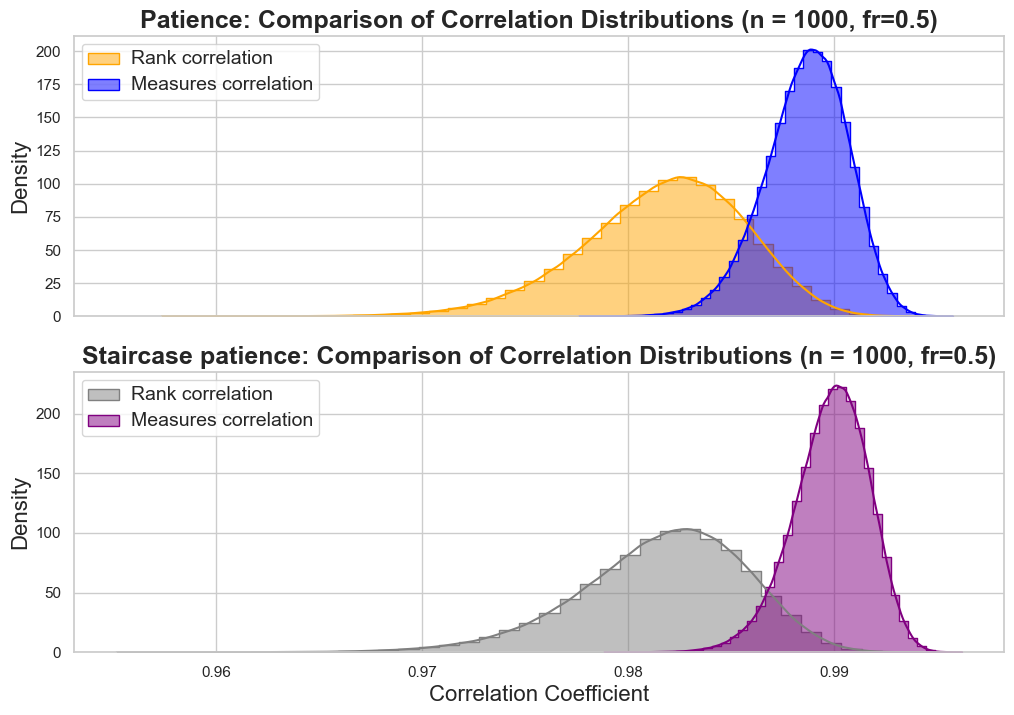

In [ ]:
sns.set(style="whitegrid")

# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Plotting the histograms for the second plot
sns.histplot(flat_corr_values_rank, bins=40, color='orange', kde=True, label='Rank correlation', element='step', stat='density', ax=axes[0])
sns.histplot(flat_corr_values_measure, bins=40, color='blue', kde=True, label='Measures correlation', element='step', stat='density', ax=axes[0])

# Adding labels and title for the second plot
axes[0].set_ylabel('Density', fontsize=16)
axes[0].set_title('Patience: Comparison of Correlation Distributions (n = 1000, fr=0.5)', fontsize=18, fontweight='bold')

# Adding a legend for the second plot with increased font size
legend_0 = axes[0].legend()
for text in legend_0.get_texts():
    text.set_fontsize(14)

# Plotting the histograms for the first plot
sns.histplot(corr_values_rank_s, bins=40, color='grey', kde=True, label='Rank correlation', element='step', stat='density', ax=axes[1])
sns.histplot(corr_values_measure_s, bins=40, color='purple', kde=True, label='Measures correlation', element='step', stat='density', ax=axes[1])

# Adding labels and title for the first plot
axes[1].set_ylabel('Density', fontsize=16)
axes[1].set_title('Staircase patience: Comparison of Correlation Distributions (n = 1000, fr=0.5)', fontsize=18, fontweight='bold')
axes[1].set_xlabel('Correlation Coefficient', fontsize=16)

# Adding a legend for the first plot with increased font size
legend_1 = axes[1].legend()
for text in legend_1.get_texts():
    text.set_fontsize(14)

# Display the combined plot
plt.show()
